In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'dataset/mnist-jpg/mnist-jpg/train/'
test_dir = 'dataset/mnist-jpg/mnist-jpg/test/'

In [13]:
img_gen = ImageDataGenerator(rescale=1.0/255)

data_gen = img_gen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=5000,
    shuffle=True,
    class_mode='categorical'
)

Found 60000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.


In [14]:
x_train, y_train = data_gen[0]
x_test, y_test = data_gen[2]

In [15]:
from tensorflow.keras.applications import VGG16
path = 'dataset/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

vgg_model = VGG16(weights=path,include_top=False, input_shape=(32,32,3))

In [16]:
for layer in vgg_model.layers:
    layer.trainabler=False

In [17]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [22]:
custom_classifier = keras.Sequential([
    Flatten(input_shape=(1,1,512)),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    
])

model = keras.Sequential([
    vgg_model,
    custom_classifier
])

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

50/50 [==============================] - 204s 4s/step - loss: 1.6244 - accuracy: 0.3820 - val_loss: 1.2011 - val_accuracy: 0.5770


In [26]:
for layer in vgg_model.layers[:-4]:
    layer.trainable = True
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1000, epochs=1, validation_data=(x_test,y_test))

5/5 [==============================] - 208s 42s/step - loss: 2.5760 - accuracy: 0.3306 - val_loss: 2.1499 - val_accuracy: 0.2630


In [27]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, " ", acc)

32/32 [==============================] - 4s 120ms/step - loss: 2.1499 - accuracy: 0.2630
2.1498725414276123   0.2630000114440918


In [28]:
pred = model.predict(x_test)

32/32 [==============================] - 4s 115ms/step


In [29]:
labels = list(data_gen.class_indices.keys())

0


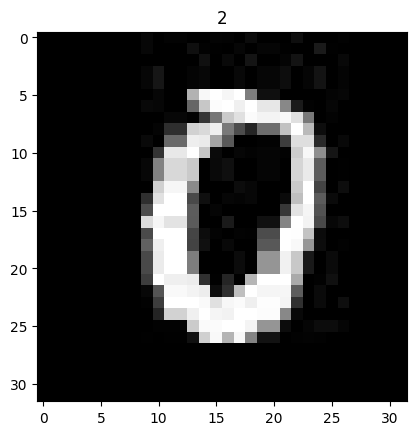

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_test[10])
plt.title(str(labels[np.argmax(pred[10])]))
print(str(labels[np.argmax(y_test[10])]))

In [33]:
y_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Note: Train the model for large epochs to get better accuracy